In [85]:
# Import neccessary model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [86]:
import statsmodels.api as sm

In [87]:
df = pd.read_csv('/content/Housing_Price_encoded.csv')

In [88]:
# Data Split
target = 'GIA - TRIEU DONG'
x = df.drop(target, axis = 1)
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


In [89]:
# Convert all data into float
x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)
y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)

In [90]:
# Fit Data
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_predict = linear_model.predict(x_test)


In [91]:
linear_model.score(x_test,y_test)

0.3743090605045911

In [93]:
print(f"Coefficients: {linear_model.coef_}")
print(f"Intercept: {linear_model.intercept_}")

Coefficients: [ 3126.71105787    37.08303816    48.24423105   124.8165478
   168.95055428  -293.76710208 -1350.42209475  -668.76112917
 -2071.17905601  9365.00799191  1354.61687843  -345.48136019
 -1370.42223499   629.57002023   438.10414009   431.71394929
  -896.1466677   -826.01770076  -538.08562686 -1285.42360355
 -1074.22121997   952.49701031 -1175.31993161  -866.28666235
  1116.43677274 -1033.74487363  -279.64879253  -506.78580893]
Intercept: 3688.1596876689423


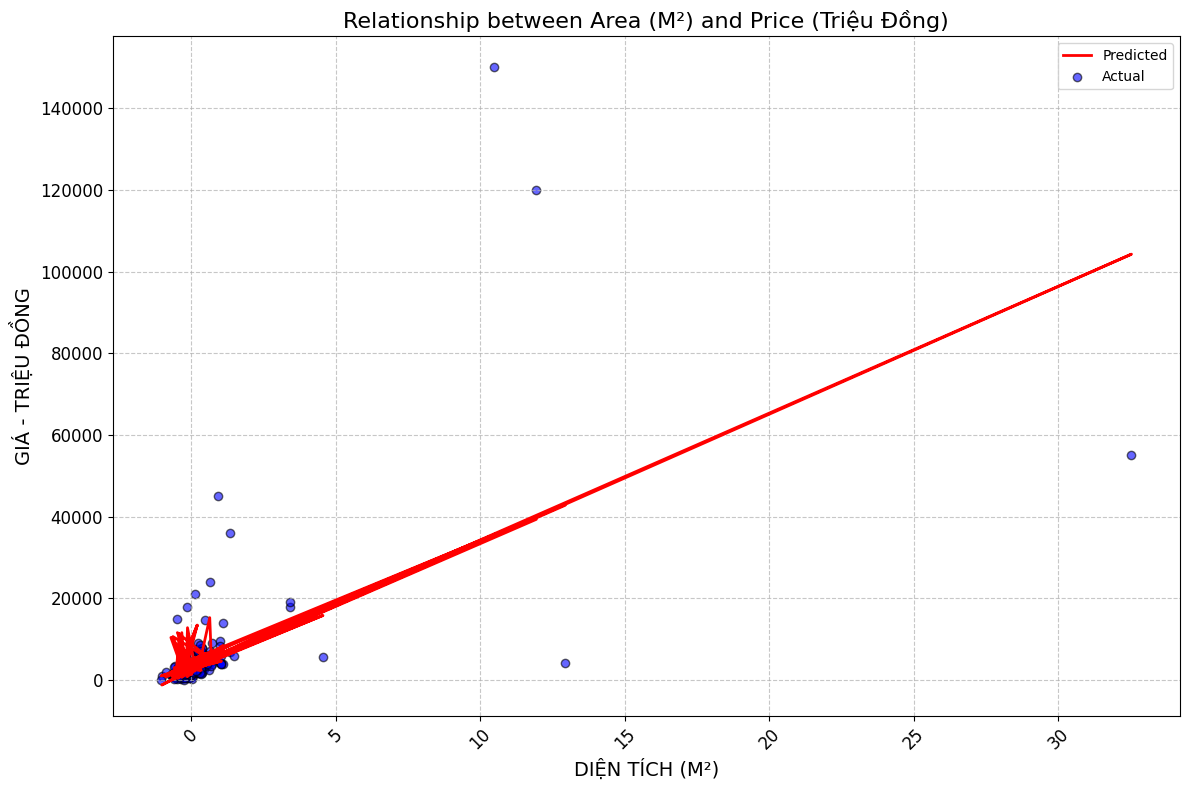

In [94]:

# DIEN TICH - M2 & GIA - TRIEU DONG
fig, ax = plt.subplots(figsize=(12, 8))  # Increase the figure size for better visibility

# Plot the predicted values
ax.plot(x_test['DIEN TICH - M2'], y_predict, color='red', label='Predicted', linewidth=2)

# Scatter plot for actual values
ax.scatter(x_test['DIEN TICH - M2'], y_test, alpha=0.6, color='blue', label='Actual', edgecolors='black')

# Set axis labels with larger font size
ax.set_xlabel('DIỆN TÍCH (M²)', fontsize=14)
ax.set_ylabel('GIÁ - TRIỆU ĐỒNG', fontsize=14)

# Add a title to the plot
ax.set_title('Relationship between Area (M²) and Price (Triệu Đồng)', fontsize=16)

# Rotate x-axis labels if they are long
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Enable grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


In [95]:
# Use ols of stats model to see any difference
# Ensure x_train and x_test are DataFrames with the constant term added
x_train = sm.add_constant(x_train)  # Adds the intercept (constant term)
x_test = sm.add_constant(x_test)

# Convert x_train, y_train, x_test, y_test to NumPy arrays
np_xtrain = x_train.to_numpy()  # Features in NumPy format
np_ytrain = y_train.to_numpy()  # Target variable (train set) in NumPy format
np_xtest = x_test.to_numpy()    # Features (test set) in NumPy format
np_ytest = y_test.to_numpy()    # Target variable (test set) in NumPy format

# Fit OLS model

model = sm.OLS(np_ytrain, np_xtrain)
results = model.fit()

# Print summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     67.19
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          6.07e-219
Time:                        09:34:25   Log-Likelihood:                -11848.
No. Observations:                1327   AIC:                         2.375e+04
Df Residuals:                    1300   BIC:                         2.389e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2674.9290     73.694     36.298      0.0

In [97]:

# Predict on the test dataset
y_test_pred = results.predict(np_xtest)

In [99]:
# Evaluate the model
# Calculate R-squared on the test data
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test, y_test_pred)
print(f"R-squared on Test Data: {test_r2}")

R-squared on Test Data: 0.374309060504591
